In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)


In [ ]:
# Importing libraries needed, loading train and test csv files to jupiter

In [24]:
big_train = pd.read_csv('C:/Users/Anish/Downloads/train_v9rqX0R.csv')
big_test = pd.read_csv('C:/Users/Anish/Downloads/test_AbJTz2l.csv')


In [27]:
big_test.head

<bound method NDFrame.head of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1    

In [26]:
big_train.head

<bound method NDFrame.head of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   

In [28]:
big_train.shape, big_test.shape

((8523, 12), (5681, 11))

In [29]:
big_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [30]:
big_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# Filling null values in train and test files

In [31]:
big_train['Item_Weight'] =  big_train['Item_Weight'].fillna(big_train['Item_Weight'].mean())
big_test['Item_Weight'] =  big_test['Item_Weight'].fillna(big_test['Item_Weight'].mean())

In [32]:
big_train['Outlet_Size'] =  big_train['Outlet_Size'].fillna(big_train['Outlet_Size'].mode()[0])
big_test['Outlet_Size'] =  big_test['Outlet_Size'].fillna(big_test['Outlet_Size'].mode()[0])

In [33]:
big_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [34]:
big_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

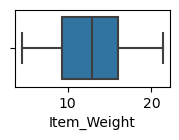

In [74]:
import seaborn as sns
plt.figure(figsize=(2,1))
sns.boxplot(x=big_train['Item_Weight'])



In [36]:
big_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
# Using label encoders

In [37]:
from sklearn.preprocessing import LabelEncoder
for i in big_train.columns:
    if big_train[i].dtype == 'object':
        label=LabelEncoder()
        label.fit(list(big_train[i].values))
        big_train [i]=label.transform(big_train[i].values)
        


for j in big_test.columns:
    if big_test[j].dtype == 'object':
        label=LabelEncoder()
        label.fit(list(big_test[j].values))
        big_test[j]=label.transform(big_test[j].values)       

In [38]:
big_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [39]:
big_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3


In [ ]:
# Model making and regressors

In [40]:
x=big_train.drop('Item_Outlet_Sales',axis=1)
y=big_train['Item_Outlet_Sales']

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=0)

In [42]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


In [45]:
lr=LinearRegression()

knnr = KNeighborsRegressor(n_neighbors=10)

dtr = DecisionTreeRegressor(max_depth = 3)

rfr = RandomForestRegressor(max_depth = 3, n_estimators=500)



In [47]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score
pr1 = r2_score(y_test,y_pred)
pr1

0.5127044026662455

In [48]:
knnr = KNeighborsRegressor(n_neighbors=10)
knnr.fit(x_train,y_train)

y_pred = knnr.predict(x_test)
from sklearn.metrics import r2_score,mean_absolute_error
pr2 = r2_score(y_test,y_pred)
pr2

0.5559037287193085

In [82]:
predictionvalues=y_pred
predictionvalues

array([3032.86523375,  945.98184794, 2012.55865453, ..., 3253.91334927,
        145.35177653, 5120.5320377 ])

In [88]:
type(predictionvalues)

numpy.ndarray

In [91]:
predictionvalues=pd.DataFrame(predictionvalues,columns = ['predictionvalues'])

In [85]:
new1=big_train.drop(['Item_Outlet_Sales'], axis=1)
new1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2


In [93]:
finalprediction=print(pd.concat([new1,predictionvalues],axis=1))


      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 1         0.016047   
1                   8        5.920                 2         0.019278   
2                 662       17.500                 1         0.016760   
3                1121       19.200                 2         0.000000   
4                1297        8.930                 1         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 1         0.056783   
8519              897        8.380                 2         0.046982   
8520             1357       10.600                 1         0.035186   
8521              681        7.210                 2         0.145221   
8522               50       14.800                 1         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [111]:
finalprediction= pd.concat([new1,predictionvalues],axis=1)

In [113]:
finalprediction

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,predictionvalues
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3032.865234
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,945.981848
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2012.558655
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,2176.230988
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,3219.601955
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,NaN
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,NaN
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,NaN
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,NaN


In [114]:
df = pd.DataFrame(finalprediction)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,predictionvalues
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3032.865234
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,945.981848
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2012.558655
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,2176.230988
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,3219.601955
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,NaN
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,NaN
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,NaN
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,NaN


In [116]:
df.to_csv(r"C:\Users\Anish\Desktop\Predictedresult.csv",index=False)

In [109]:
dtr = DecisionTreeRegressor(max_depth = 3)
dtr.fit(x_train,y_train)

y_pred = dtr.predict(x_test)
from sklearn.metrics import r2_score
pr3 = r2_score(y_test,y_pred)
pr3

0.5373350141246751

In [51]:
rfr = RandomForestRegressor(max_depth = 3, n_estimators=500)
rfr.fit(x_train,y_train)

y_pred = rfr.predict(x_test)
from sklearn.metrics import r2_score
pr4 = r2_score(y_test,y_pred)
pr4

0.549892948060108

In [53]:
metric_results= {'Model': ['linear Regression', 'KNeighbors', 'Decision Tree','RandomForest'], 
                 'R Square': [pr1,pr2, pr3,pr4]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,R Square
0,linear Regression,0.512704
1,KNeighbors,0.555904
2,Decision Tree,0.537335
3,RandomForest,0.549893


In [76]:
from sklearn.metrics import confusion_matrix

In [ ]:
#   K NEAREST ALGORITHM GIVES BEST RESULTS

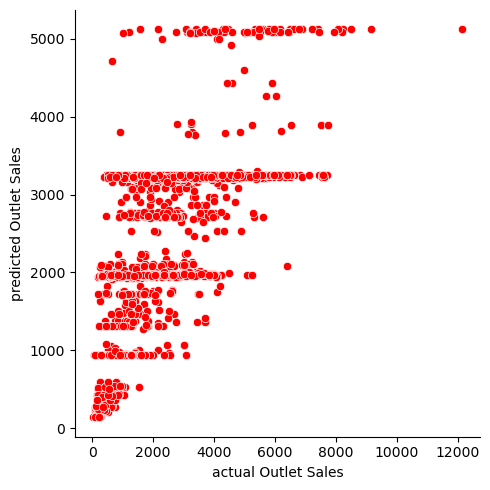

In [62]:
prediction= pd.DataFrame({'actual Outlet Sales': y_test, 'predicted Outlet Sales': y_pred})
sns.relplot(data=prediction, x='actual Outlet Sales', y='predicted Outlet Sales', color = 'red')

